# Predicting House Prices using machine learning

This notebook discusses the use of Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting housing prices in different areas of the United States.

Approach to solve the problem:

Problem definition
Data
Evaluation
Modelling
Experimentation

## 1. Problem Definition

In a statement,

> A real estate agent wants you to help him predict house prices in different areas of the United States. Starting with a set of data, create a model to help him estimate the selling price of the house.

## 2. Data

The original data came from the Kaggle website. https://www.kaggle.com/datasets/yuanheqiuye/usa-house-price

## 3. Evaluation

If 90% accuracy is reached at predicting the house selling price, the project will continue.

## 4. Features

The dataset 5000 rows and the 7 following columns :

* **Avg. Area Income** – Avg. The income of the householder of the city house is located.
* **Avg. Area House Age** – Avg. Age of Houses in the same city.
* **Avg. Area Number of Rooms** – Avg. Number of Rooms for Houses in the same city.
* **Avg. Area Number of Bedrooms** – Avg. Number of Bedrooms for Houses in the same city.
* **Area Population** – Population of the city.
* **Price** – Price that the house sold at.
* **Address** – Address of the houses.

## Preparing the tools

* Pandas, NumPy, Seaborn and Matplotlib for data analysis and manipulation.
* Models and evaluation from Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

## Importing Data

In [2]:
house_df = pd.read_csv('USA_Housing.csv')
house_df.shape # (rows, columns)

(5000, 7)

## Data Exploration (exploratory data analysis or EDA)

In [3]:
house_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
house_df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.729,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.872,USS Wallace\nFPO AE 73316
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1298950.480,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
house_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


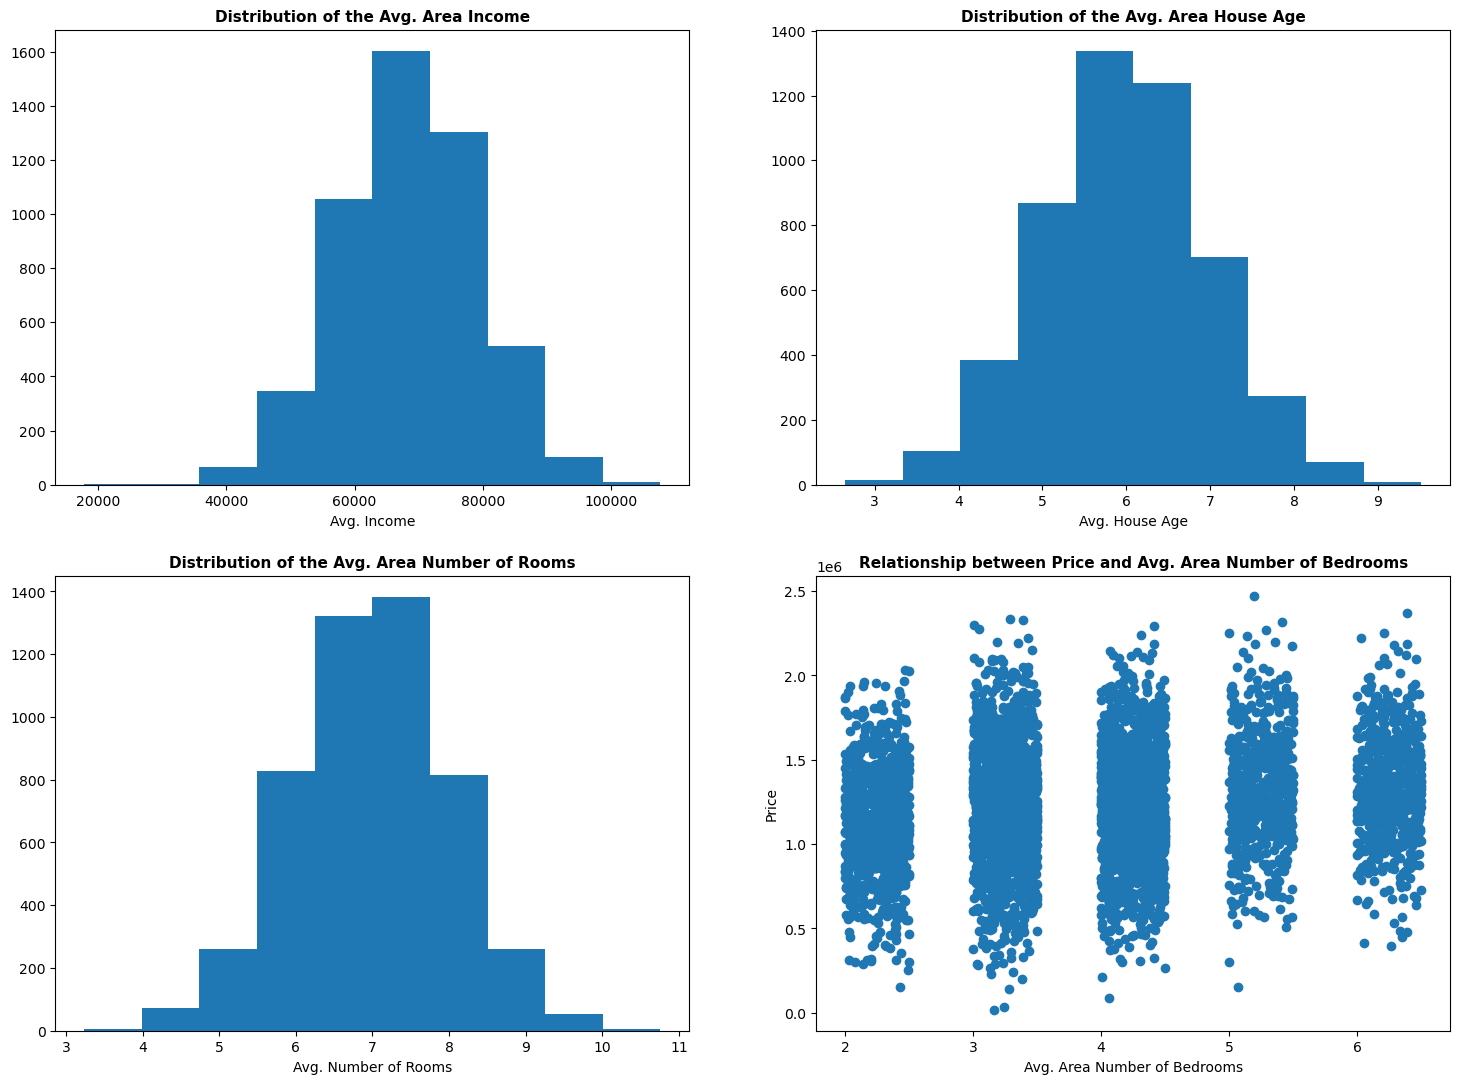

In [7]:
# Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(18, 13))

# Plot data to each axis
ax1.hist(house_df['Avg. Area Income']);
ax2.hist(house_df['Avg. Area House Age']);
ax3.hist(house_df['Avg. Area Number of Rooms']);
ax4.scatter(house_df['Avg. Area Number of Bedrooms'], house_df['Price'])

ax1.set_title('Distribution of the Avg. Area Income', fontweight='bold', fontsize=11)
ax1.set_xlabel('Avg. Income')

ax2.set_title('Distribution of the Avg. Area House Age', fontweight='bold', fontsize=11)
ax2.set_xlabel('Avg. House Age')

ax3.set_title('Distribution of the Avg. Area Number of Rooms', fontweight='bold', fontsize=11)
ax3.set_xlabel('Avg. Number of Rooms')

ax4.set_title('Relationship between Price and Avg. Area Number of Bedrooms', fontweight='bold', fontsize=11)
ax4.set_ylabel('Price')
ax4.set_xlabel('Avg. Area Number of Bedrooms');

Here are some simple graphs to visualise the data, showing the normal distribution of Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms and the relationship between Avg. Area Number of Bedrooms and the Price.

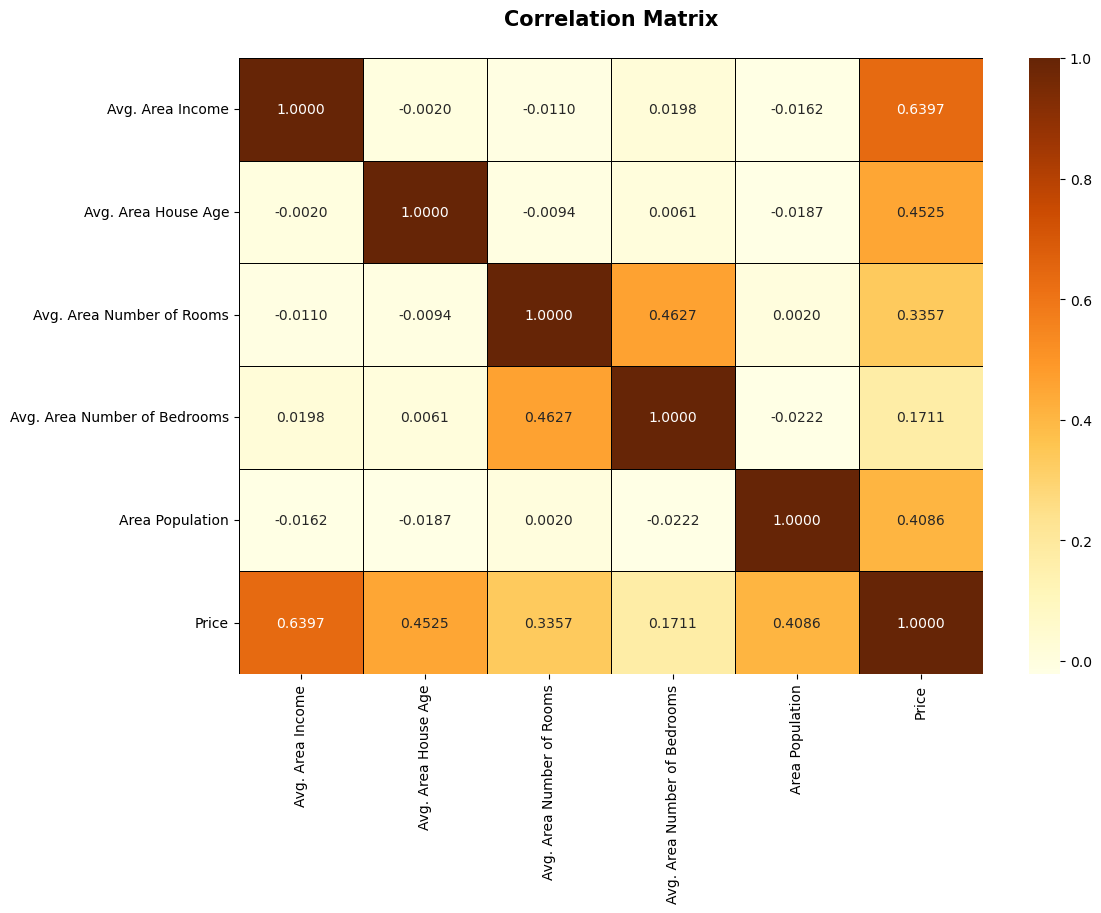

In [8]:
# Plot the correlation matrix
corr_matrix = house_df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5,
                 linecolor='black', 
                 fmt= ".4f", 
                 cmap="YlOrBr")

ax.set_title('Correlation Matrix', fontweight='bold', fontsize=15, y=1.04);

This correlation matrix shows the relationship between the different columns. A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation.
Some important insights:
* The highest positive correlation is between Avg. Area Income and Price
* The highest negative correlation is between Avg. Area Number of Bedrooms and Area Population

## Get Data Ready For Training a Linear Regression Model

To predict the price variable using all other variables, it is necessary to separate the price variable from the rest and ignore the Address column because it only has text which is not useful for linear regression modeling.

In [9]:
# Split data into X and y, except Price variable
X = house_df.drop(['Price', 'Address'], axis=1)

y = house_df['Price']

In [10]:
# Independent variables (no Price column)
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [11]:
# Dependent variable (Price column)
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## Split Data into Train, Test sets

The training set (70% of the total data) will be used to train the model and the test set (30% of the total data) will be used to test the model.
The test set must remain separate from the training set.

In [12]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.3, 
                                                    random_state=101) # percentage of data to use for test set

X_train and y_train contain data for the training model. X_test and y_test contain data for the testing model. X and y are features and target variable names.

## LinearRegression Model creation and training

In [13]:
# Creation of sklearn LinearRegression model
linear_reg_model = LinearRegression()

In [14]:
# Fit the training dataset into the model
linear_reg_model.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [15]:
coeff_df = pd.DataFrame(linear_reg_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376595
Avg. Area Number of Bedrooms,1318.718781
Area Population,15.225196


Coefficient interpretation:

Holding all other features fixed:
* 1 unit increase in **Avg. Area Income** is associated with an increase of **\\$21.52** in the **Price** variable.
* 1 unit increase in **Avg. Area House Age** is associated with an increase of **\\$164883.28** in the **Price** variable.
* 1 unit increase in **Avg. Area Number of Rooms** is associated with an increase of **\\$122368.67** in the **Price** variable.
* 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an increase of **\\$2233.80** in the **Price** variable.
* 1 unit increase in **Area Population** is associated with an increase of **\\$15.15** in the **Price** variable.

In [16]:
predictions = linear_reg_model.predict(X_test)

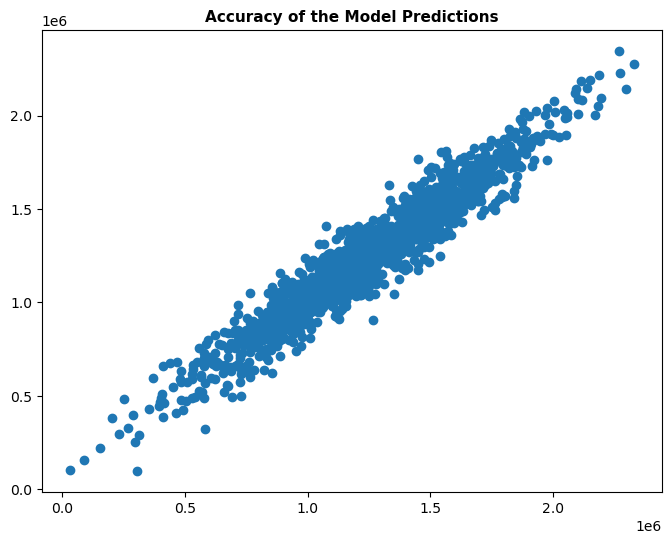

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(y_test,predictions)
ax.set_title('Accuracy of the Model Predictions', fontweight='bold', fontsize=11);

In the scatter plot above, it can be seen that the data is distributed as a line, which means that our model has made fairly accurate predictions.

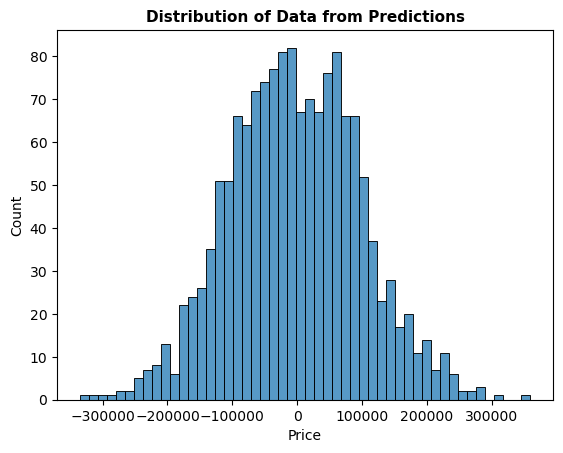

In [18]:
sns.histplot((y_test-predictions),bins=50).set_title('Distribution of Data from Predictions', fontweight='bold', fontsize=11);

This histogram shows that the residuals are normally distributed, in a bell-shaped pattern, which also shows that the predictions made by the model are accurate.

# Regression Evaluation Metrics

In [19]:
def regression_metrics():
    my_dict = {'r2_score': r2_score(y_test, predictions), 
               'MAE': metrics.mean_absolute_error(y_test, predictions), 
               'MSE': metrics.mean_squared_error(y_test, predictions), 
               'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions))}
    return my_dict

In [20]:
regression_metrics()

{'r2_score': 0.9185060945460711,
 'MAE': 81257.55794597729,
 'MSE': 10169125565.180105,
 'RMSE': 100842.08231279293}

* **r2_score**: R Square is a good measure to determine how well the model fits the dependent variables, its value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.
* **MAE**: Mean Absolute Error is the average absolute error between actual and predicted values, is in terms of the unit being predicted.
* **MSE**: Mean Squared Error is the average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers, it “punishes” larger errors, which tends to be useful in the real world.
* **RMSE**: Root Mean Squared Error, Its very poppular because the metric it produces is also in terms of the unit being predicted.

# Conclusions:

The model achieved an accuracy of approximately 91.8% meeting the initial objective, and although the mean absolute error of approximately \\$81,257 may seem high it should be beard in mind that this is an acceptable value when working with prices ranging above \\$1,000,000, representing a difference of 8 to 10% between the actual value and the mean absolute error, and although acceptable the model could be improved by modifying parameters. The same applies to the value of the Root Mean Square Error.
However, the model could still be effective in helping a real estate agent to predict house prices.